In [24]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
from datetime import datetime

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap


ct1 = pd.read_csv("../data/cases_2021_train.csv", parse_dates=['date_confirmation'])
ct2 = pd.read_csv("../data/cases_2021_test.csv")
ct3 = pd.read_csv("../data/location_2021.csv")

ct1.drop(columns=['outcome_group'],inplace=True)


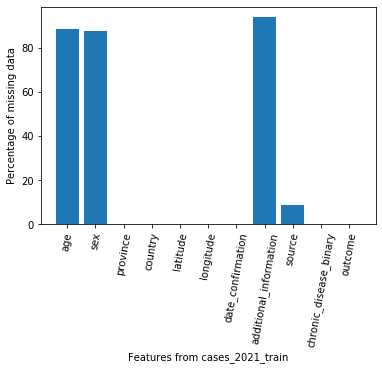

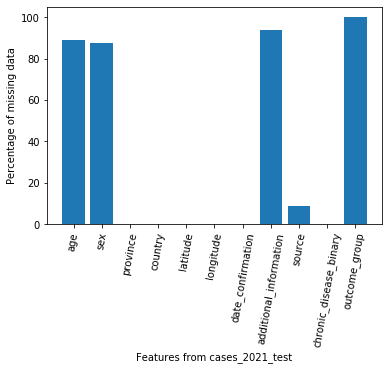

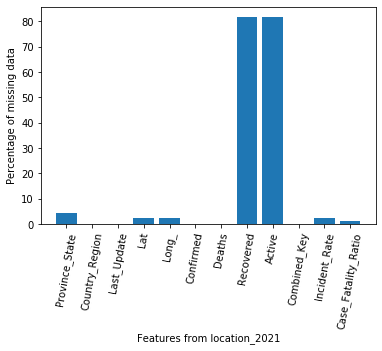

In [25]:
#Percentage of missing vlaues in all datasets

def miss(dataset, name):
    yval = []

    for x in dataset.columns.values.tolist():
        n_sum = dataset.groupby(x).size().sum()
        n_na = dataset[x].isna().sum()
        ratio = 100 * n_na/(n_sum+n_na)
        yval.append(ratio)

    pyplot.bar(dataset.columns.values.tolist(),yval)
    pyplot.xlabel('Features from ' + name)
    pyplot.ylabel('Percentage of missing data')

    pyplot.xticks(rotation=80) #no overlap of text
    pyplot.show()



miss(ct1, "cases_2021_train")
miss(ct2, "cases_2021_test")
miss(ct3, "location_2021")

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


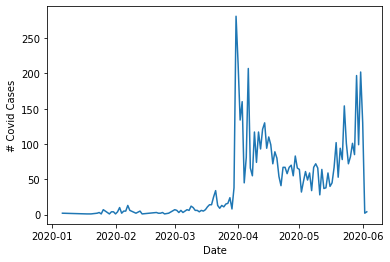

In [26]:
ct1.loc[ct1['date_confirmation'] == '25.02.2020 - 26.02.2020','date_confirmation'] = '25.02.2020'
ct1.dropna(inplace=True)

dates = [] #dates
helperlist = []
for x in range(0,len(ct1.groupby('date_confirmation').size())):
    helperlist.append(ct1.groupby('date_confirmation').size().index[x])

for x in helperlist:
    dates.append(datetime.strptime(str(x), "%d.%m.%Y"))
cases = [] #covid cases
for x in ct1.groupby('date_confirmation').size():
    cases.append(x)


npcases = np.array(cases)
npdates = np.array(dates)
sortedcases = npcases[npdates.argsort()]
npdates.sort()


pyplot.plot(npdates,sortedcases)

pyplot.ylabel('# Covid Cases')
pyplot.xlabel('Date')
pyplot.xticks(rotation=0) #no overlap of text

pyplot.show()


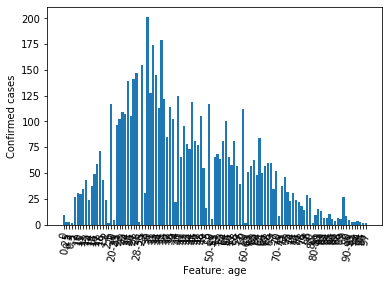

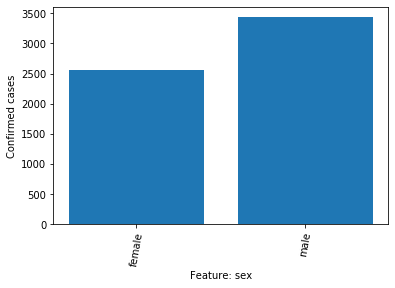

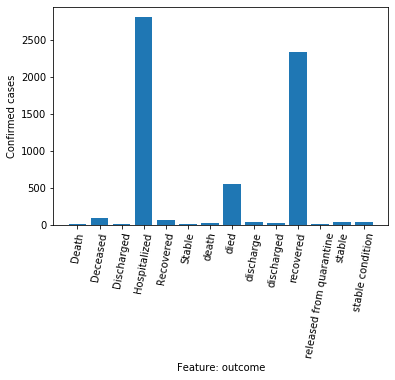

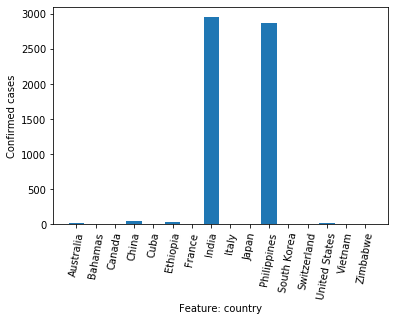

In [27]:
#spread of variables
def spreadVar(dataset, feature):
    xval = []
    for x in range(0,len(dataset.groupby(feature).size())):
        xval.append(dataset.groupby(feature).size().index[x])
    pyplot.bar(xval, dataset.groupby(feature).size())
    pyplot.ylabel('Confirmed cases')
    pyplot.xlabel('Feature: '+feature)

    pyplot.xticks(rotation=80) #no overlap of text
    pyplot.show()
    

coolFeatures = ['age','sex','outcome','country']

for x in coolFeatures:
    spreadVar(ct1,x)

In [28]:
#spread of country, maybe heatmap for countries
triple =[]
ct3 = ct3[ct3['Lat'].notna()]

for x, y, z in zip(ct3.Lat,ct3.Long_,ct3.Confirmed):
    triple.append([x, y, z])
    
world_map= folium.Map(tiles="cartodbpositron")
HeatMap(triple).add_to(world_map)

world_map  